In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
housing_train = pd.read_csv('train.csv')

In [3]:
# creating a deep copy of the dataset
df = housing_train.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Naive Predictions

In [5]:
# use mean price of all dataset to predict
s = df['SalePrice'].mean()
print(s)

180921.19589041095


In [6]:
# loading test dataset
housing_test = pd.read_csv('test.csv')

In [7]:
# predict all housing are selling in mean price
housing_test['SalePrice'] = s
housing_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,180921.19589
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,180921.19589
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180921.19589
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180921.19589
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,180921.19589


In [8]:
housing_submit_allmean = housing_test[['Id','SalePrice']]
housing_submit_allmean.to_csv('housing_submit_allmean.csv', index=False)

![jupyter](./housing_submit_allmean.png)

# Data Preprocessing

In [9]:
# prepare the data. Split into X and y.
X = df.drop(["SalePrice","Id"], axis=1)
y = df.SalePrice
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# split the data into training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1168, 79)
(292, 79)


In [11]:
corr_matrix = df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [12]:
num_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

## I would like to use all features in the dataset because all the features are some kind correlated with the saleprice. 

# Pipeline Construction

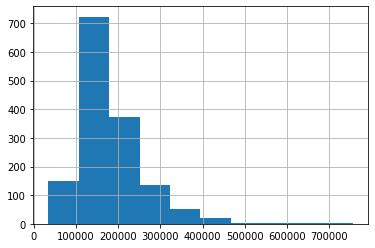

In [13]:
df.SalePrice.hist()

In [14]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# Use median as the strategy here since the Saleprice is relative normal distribution.
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ]
)

In [16]:
# Assign features to the pipelines
# Combine pipeline to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

lin_reg_full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lin_reg', LinearRegression()),
    ]
)

SGD_reg_full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('SGD_reg',SGDRegressor())
    ]
)

# Linear Regression

In [18]:
# use named_steps[] to access any step in your pipeline
lin_reg_full_pipeline.fit(X_train, y_train) # train the model using all training data
print(lin_reg_full_pipeline.named_steps['lin_reg'].intercept_, lin_reg_full_pipeline.named_steps['lin_reg'].coef_)

-49071.08403572551 [ 9.76165296e+01  1.42565075e+02  7.16352779e+03  9.06724124e+03
  6.51944483e+03  9.71785533e+03  2.64651458e+03  4.27463128e+03
  8.26401571e+03  1.26966407e+03 -1.12087177e+02  8.95128880e+03
  5.41624136e+03  1.28039096e+04 -1.37446382e+03  1.46000305e+04
  8.83455066e+02 -5.99154765e+02  1.59567929e+03  1.05690427e+03
 -2.02413987e+03 -2.88812146e+03  3.23150586e+03  1.81185771e+03
  5.99047043e+02  5.89808000e+02  5.33010955e+03  2.20562302e+03
  7.90495231e+01 -3.30588260e+02  1.59467434e+03  1.85386266e+03
  9.68627652e+03  9.63589209e+02 -1.13839569e+03 -4.20341339e+02
 -1.68652111e+04  1.05662406e+04  1.65995984e+03  2.88675457e+03
  1.75225603e+03 -1.11977954e+04  1.11977954e+04 -2.49012414e+03
  2.49012414e+03 -4.05290348e+03  3.19768131e+03  3.07318104e+03
 -2.21795886e+03 -3.56607772e+03  1.13040016e+04 -9.68737941e+03
  1.94945551e+03  1.85289628e+04 -1.85289628e+04  3.84272463e+03
  1.37395204e+04 -2.96367835e+03 -1.79901518e+04  3.37158517e+03
  1.35

In [19]:
# making the prediction
y_pred = lin_reg_full_pipeline.predict(X_test)

In [20]:
y_pred[0:3]

array([158996.06332817, 347393.9126183 ,  86484.56789947])

In [21]:
y_test[0:3]

892     154500
1105    325000
413     115000
Name: SalePrice, dtype: int64

In [22]:
# Calculate the RMSE
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

29447.31698889463

# SGD Regression - Model Selection and Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# IMPORTANT!!!!!!!
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names
# you also need to specify the "full path" of the steps
# as you can see we can even grid search parameters for preprocessing pipeline step
param_grid = [
    {
        'SGD_reg__max_iter': [500,1000,1500],
        'SGD_reg__tol': [1e-3,2e-3,3e-3], 
        'SGD_reg__penalty': ['l2', 'l1', 'elasticnet'],
        'SGD_reg__eta0':[0.1,0.2,0.3],
    }
]

# set up the grid search 
grid_search = GridSearchCV(SGD_reg_full_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                       

* max_iterint is The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.
* tol is the stopping criterion. If it is not None, the iterations will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.
* eta0 is the initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.

In [24]:
grid_search.best_params_

{'SGD_reg__eta0': 0.1,
 'SGD_reg__max_iter': 500,
 'SGD_reg__penalty': 'elasticnet',
 'SGD_reg__tol': 0.003}

In [25]:
SGD_reg_best = grid_search.best_estimator_
SGD_reg_best

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                

In [26]:
# making prediction
y_pred = SGD_reg_best.predict(X_test)

In [27]:
y_pred[0:3]

array([ 8.00197437e+09,  4.23188335e+10, -1.35543134e+10])

In [28]:
y_test[:3]

892     154500
1105    325000
413     115000
Name: SalePrice, dtype: int64

In [29]:
# Calculate the RMSE
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

47743322223.743576

# Use Linear Regression to Make the Prediction

In [31]:
y_pred_housing = lin_reg_full_pipeline.predict(housing_test)

# combine id and prediction for kaggle submission
lin_full_pipeline_submit = pd.DataFrame({
    'Id': housing_test['Id'],
    'SalePrice': y_pred_housing
})

# generate the csv
lin_full_pipeline_submit.to_csv('housing_submit_lin.csv', index=False)
print('csv saved! please submit the prediction csv to Kaggle.com')

csv saved! please submit the prediction csv to Kaggle.com


/Users/dennisxghuang/misy467-assignments/venv/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


![jupyter](./housing_submit_lin.png)